Product Performance Analysis

Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing CSV File

In [2]:
df = pd.read_csv("generated_data.csv")
df.head()

,Product_Name,HSN_Code,Qty,Rate,Amount,Bill_No,Bill_Date,Buyer_Name
0,WHITE SBR(5 LTR),382450,88,1456,128128,1470,02-02-2024,"Stewart, Stanley and Brooks"
1,BROMEL FIX TYPE-1,382450,443,1289,571027,6086,15-07-2023,Wilson-Cortez
2,SPARKAL COPPER,382450,456,1946,887376,1446,13-05-2016,Snyder-Conrad
3,WHITE SBR(5 LTR),382450,370,870,321900,2578,20-11-2017,Wallace-Perez
4,BLOCK JOINING MOTAR,382450,934,1899,1773666,2955,05-04-2021,Bennett and Sons


Converting Date Column To 'datetime()'

In [3]:
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'], format='%d-%m-%Y')

Checking NULL Values

In [4]:
df.isnull().sum()

Product_Name    0
HSN_Code        0
Qty             0
Rate            0
Amount          0
Bill_No         0
Bill_Date       0
Buyer_Name      0
dtype: int64

DataFrame Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product_Name  10000 non-null  object        
 1   HSN_Code      10000 non-null  int64         
 2   Qty           10000 non-null  int64         
 3   Rate          10000 non-null  int64         
 4   Amount        10000 non-null  int64         
 5   Bill_No       10000 non-null  int64         
 6   Bill_Date     10000 non-null  datetime64[ns]
 7   Buyer_Name    10000 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 625.1+ KB


Each Transaction Amount

In [6]:
df['Amount']

0        128128
1        571027
2        887376
3        321900
4       1773666
         ...   
9995      86391
9996     415680
9997     405251
9998     384282
9999    1033588
Name: Amount, Length: 10000, dtype: int64

Calculating Total Product Quantity Sold

In [7]:
total_qty_sold = df['Qty'].sum()
total_qty_sold

5011012

Calculating Average Selling Price

In [8]:
df['Average_Selling_Price'] = df['Amount'] / df['Qty']
df['Average_Selling_Price']

0       1456.0
1       1289.0
2       1946.0
3        870.0
4       1899.0
         ...  
9995     993.0
9996     433.0
9997    1463.0
9998     577.0
9999    1109.0
Name: Average_Selling_Price, Length: 10000, dtype: float64

Final DataFrame

In [9]:
df

,Product_Name,HSN_Code,Qty,Rate,Amount,Bill_No,Bill_Date,Buyer_Name,Average_Selling_Price
0,WHITE SBR(5 LTR),382450,88,1456,128128,1470,2024-02-02,"Stewart, Stanley and Brooks",1456.0
1,BROMEL FIX TYPE-1,382450,443,1289,571027,6086,2023-07-15,Wilson-Cortez,1289.0
2,SPARKAL COPPER,382450,456,1946,887376,1446,2016-05-13,Snyder-Conrad,1946.0
3,WHITE SBR(5 LTR),382450,370,870,321900,2578,2017-11-20,Wallace-Perez,870.0
4,BLOCK JOINING MOTAR,382450,934,1899,1773666,2955,2021-04-05,Bennett and Sons,1899.0
...,...,...,...,...,...,...,...,...,...
9995,SPARKAL COPPER,382450,87,993,86391,5369,2016-07-28,"Lopez, Armstrong and Clark",993.0
9996,SPARKAL GOLDEN,382450,960,433,415680,4774,2017-10-16,George-Schmidt,433.0
9997,BROMEL FIX TYPE-2,382450,277,1463,405251,6241,2022-04-15,"Hamilton, Mitchell and Gray",1463.0
9998,SPARKAL SILVER,382450,666,577,384282,8756,2021-03-05,Howard-Peterson,577.0


Visualization Of Various Analysis

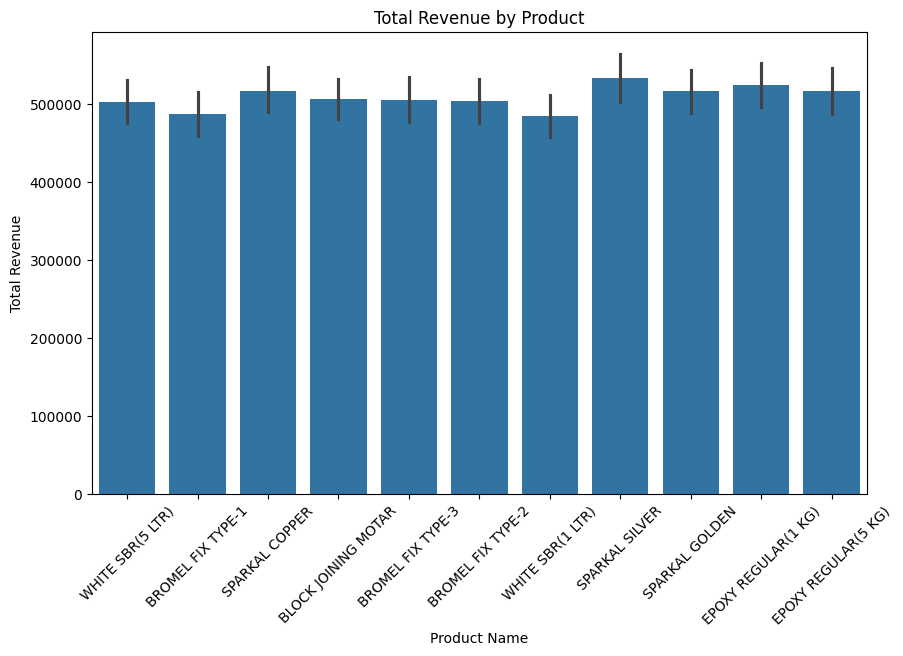

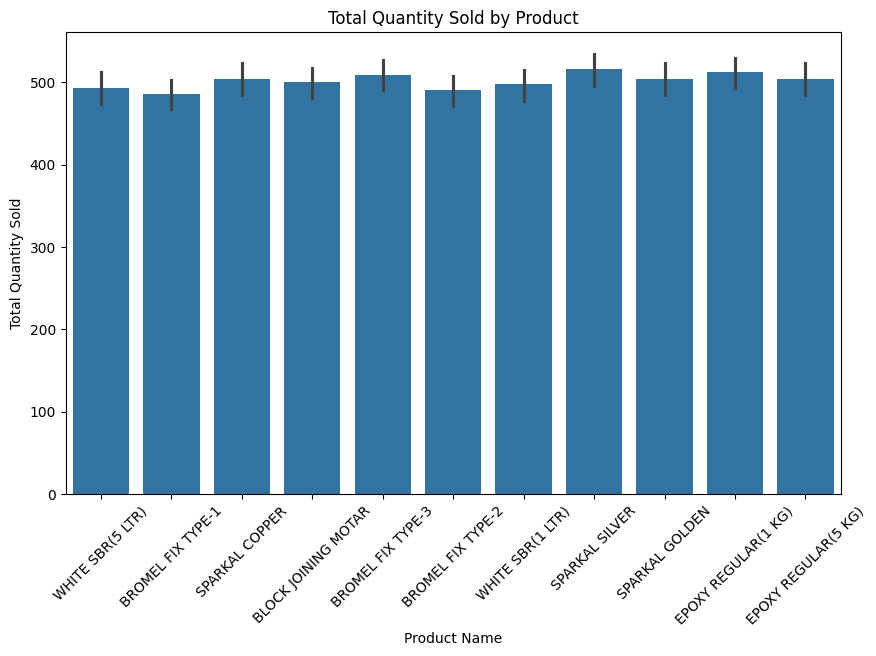

In [10]:
# Visualize Product Performance
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Product_Name', y='Amount')
plt.title('Total Revenue by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Product_Name', y='Qty')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()



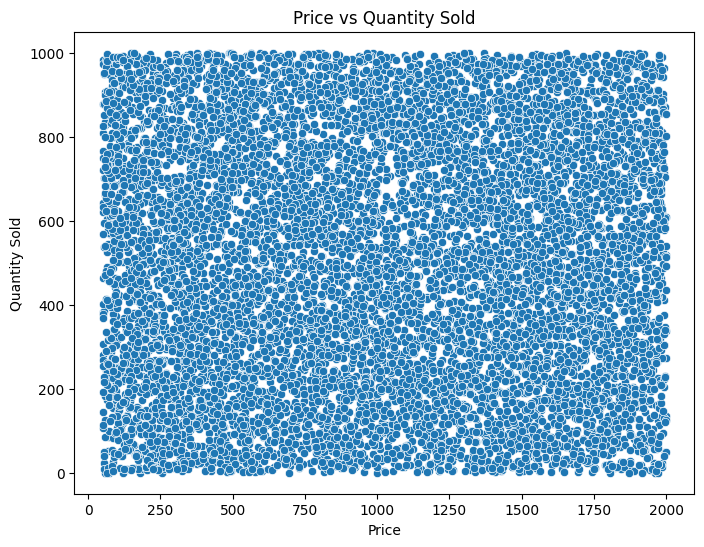

In [11]:
# Price Sensitivity Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rate', y='Qty')
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

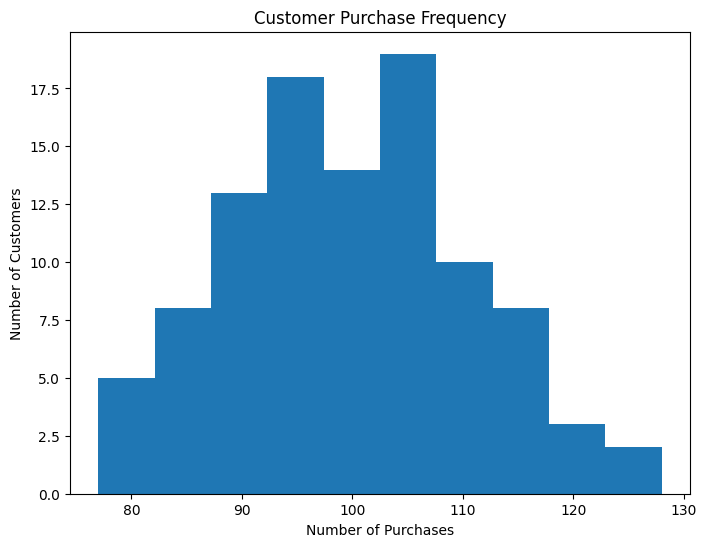

In [12]:
# Customer Loyalty Analysis
customer_purchase_freq = df['Buyer_Name'].value_counts()
plt.figure(figsize=(8, 6))
customer_purchase_freq.plot(kind='hist', bins=10)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

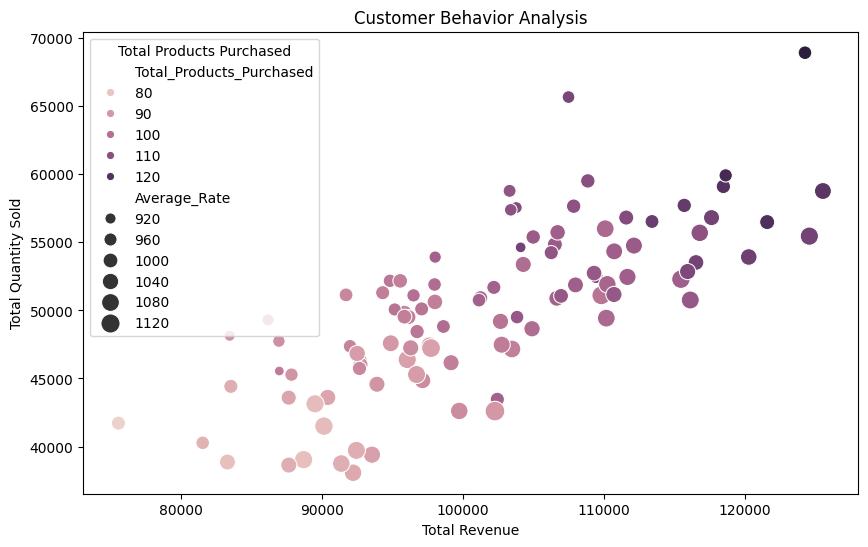

In [13]:
# Customer Behavior Analysis
customer_purchase_summary = df.groupby('Buyer_Name').agg({
    'Qty': 'sum',
    'Rate': ['sum', 'mean'],
    'Product_Name': 'count'
})

customer_purchase_summary.columns = ['Total_Quantity', 'Total_Revenue', 'Average_Rate', 'Total_Products_Purchased']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_purchase_summary, x='Total_Revenue', y='Total_Quantity', hue='Total_Products_Purchased', size='Average_Rate', sizes=(50, 200))
plt.title('Customer Behavior Analysis')
plt.xlabel('Total Revenue')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Total Products Purchased')
plt.show()